In [5]:
import pandas as pd
from matplotlib import pyplot as plt

data=pd.read_csv('data1.csv')  # Linearly separable data
# data=pd.read_csv('data2.csv')  # Non_linearly separable data
# data=pd.read_csv('data3.csv')  # Linearly separable data
# data=pd.read_csv('data4.csv')    # Linearly separable data

In [6]:
data

,F1,F2,F3,F4,F5,Label
0,-6.092099,-14.512995,-10.779728,-3.281548,-4.400666,1
1,-6.242774,-6.263302,-6.328040,-1.174447,-8.496591,1
2,-6.208259,-6.523249,-3.892901,-1.126723,0.265739,1
3,-15.551321,-15.457318,4.371455,-2.329995,-4.730726,1
4,15.555084,4.453246,-1.933674,1.604462,9.495609,0
...,...,...,...,...,...,...
1995,18.812078,29.433661,-4.754631,2.702210,5.620505,0
1996,-5.250911,-6.316989,-11.916845,-2.097494,-5.652321,1
1997,-3.100454,-7.067692,-14.264931,-3.415765,-0.567482,1
1998,-14.639663,-0.807199,-11.245349,0.773440,-4.282450,1


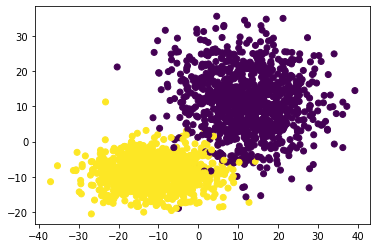

In [7]:
label=data['Label']
plt.scatter(data['F1'],data['F2'],c=label)  

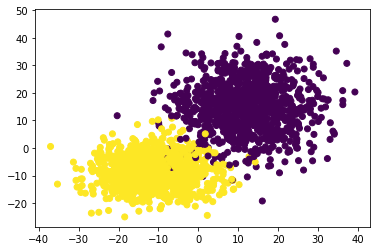

In [8]:
plt.scatter(data['F1'],data['F5'],c=label)   

In [9]:
X = data.drop(['Label'], axis=1)   # drop the column with labels, the rest of the columns are feature coulumns

y = data['Label']      # column with labels will be used for classification

print(X)
print(y)

             F1         F2         F3        F4         F5
0     -6.092099 -14.512995 -10.779728 -3.281548  -4.400666
1     -6.242774  -6.263302  -6.328040 -1.174447  -8.496591
2     -6.208259  -6.523249  -3.892901 -1.126723   0.265739
3    -15.551321 -15.457318   4.371455 -2.329995  -4.730726
4     15.555084   4.453246  -1.933674  1.604462   9.495609
...         ...        ...        ...       ...        ...
1995  18.812078  29.433661  -4.754631  2.702210   5.620505
1996  -5.250911  -6.316989 -11.916845 -2.097494  -5.652321
1997  -3.100454  -7.067692 -14.264931 -3.415765  -0.567482
1998 -14.639663  -0.807199 -11.245349  0.773440  -4.282450
1999  13.037639  12.659665  14.578667  3.118167  15.690972

[2000 rows x 5 columns]
0       1
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    1
1998    1
1999    0
Name: Label, Length: 2000, dtype: int64


In [10]:
# for splitting data arrays into two subsets: for training data and for testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=4) 

In [11]:
# for creating the classification model with perceptron

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

from sklearn.linear_model import Perceptron

In [21]:
p_clf = Perceptron(verbose=True, max_iter=5) 
# max_iter should not be this low, tou have a warning for this. By default it is 1000
p_clf

Perceptron(max_iter=5, verbose=True)

In [22]:
p_clf.fit(X_train,y_train)    # Build a classifier from the training set (X, y).

-- Epoch 1
Norm: 40.37, NNZs: 5, Bias: 2.000000, T: 1500, Avg. loss: 0.069027
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.37, NNZs: 5, Bias: 2.000000, T: 3000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 40.37, NNZs: 5, Bias: 2.000000, T: 4500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 40.37, NNZs: 5, Bias: 2.000000, T: 6000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 40.37, NNZs: 5, Bias: 2.000000, T: 7500, Avg. loss: 0.000000
Total training time: 0.00 seconds.


C:\Users\fxtim_rpx\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Perceptron(max_iter=5, verbose=True)

In [14]:
y_pred=p_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.998

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# F1 score - F1 Score is the weighted average of Precision and Recall. 
# Therefore, this score takes both false positives and false negatives into account.
#  the number of samples of the true response that lie in that class

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00       254

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

